In [1]:
import openai
import pandas as pd
import string

# Prepare Your Own Data

In [2]:
#writing openai api key
openai.api_key = "Your API Key"
#reading your dataset
df = pd.read_csv('reddit-cleanjokes.csv')
df.head()

,ID,Joke
0,1,What did the bartender say to the jumper cable...
1,2,Don't you hate jokes about German sausage? The...
2,3,Two artists had an art contest... It ended in ...
3,4,Why did the chicken cross the playground? To g...
4,5,What gun do you use to hunt a moose? A moosecut!


In [21]:
#preprocessing dataset
def divide(joke):
    for i in joke:
        if i in ['...','!','#','$','%','&','+','-','/',':',';','<','=','>','?','@','[','\\',']','^','_','{','|','}','~']: # string.punctuation
            break
    question = joke[:joke.index(i)+1]
    answer = joke[joke.index(i)+1:]
    return question, answer

#creating new dataset with prompt and completion as two columns 
data = list(df['Joke'].apply(divide))
df2 = pd.DataFrame(data, columns =['prompt', 'completion'])


#saving the new csv file
# df2.to_csv('joke.csv')
df2.iloc[:20,:].to_csv('joke.csv')

df2.tail()

,prompt,completion
1617,What do you call a camel with 3 humps?,Humphrey. (I was told this joke by an actual ...
1618,Two fish in a tank. [,x-post from r/Jokes] One asks: How do you driv...
1619,"""Stay strong!",""" I said to my wi-fi signal."
1620,Why was the tomato blushing?,Because it saw the salad dressing!
1621,What is heavy forward but not backward?,**ton**


# Convert Your Data to a Json File

In [22]:
#converting csv to jsonl format because that is the format GPT3 can be finetuned in
!openai tools fine_tunes.prepare_data -f "D:\\Projects\\ChatGPT\\joke.csv"

^C


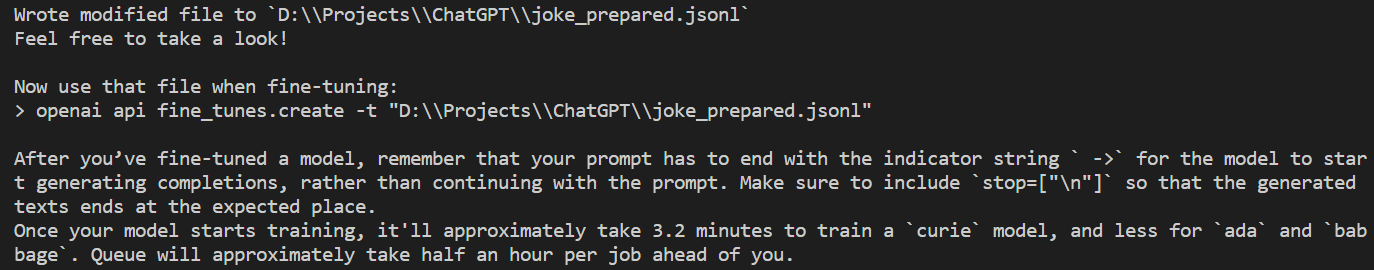

In [24]:
#creating a file id from the jsonl file
with open("joke_prepared.jsonl") as f:
#     print(f.readlines())
    response = openai.File.create(file=f, purpose='fine-tune')
    print(response)

{
  "bytes": 2252,
  "created_at": 1676536852,
  "filename": "file",
  "id": "file-GLr1lek4qWrmbCYJ3BCna8kD",
  "object": "file",
  "purpose": "fine-tune",
  "status": "uploaded",
  "status_details": null
}


# Create a fine-tune model

In [30]:
# the file id is then used to create finetune model
# base model: Davinci (model must be one of ada, babbage, curie, davinci) or a fine-tuned model created by your organization: org-CinepolaoVxVfeMBV69phRRk
# default: 4 epochs
response = openai.FineTune.create(training_file="file-GLr1lek4qWrmbCYJ3BCna8kD", model='davinci')
print(response)

{
  "created_at": 1676538774,
  "events": [
    {
      "created_at": 1676538774,
      "level": "info",
      "message": "Created fine-tune: ft-RwHbXVgL29Y5cqy0ioI9FXPT",
      "object": "fine-tune-event"
    }
  ],
  "fine_tuned_model": null,
  "hyperparams": {
    "batch_size": null,
    "learning_rate_multiplier": null,
    "n_epochs": 4,
    "prompt_loss_weight": 0.01
  },
  "id": "ft-RwHbXVgL29Y5cqy0ioI9FXPT",
  "model": "davinci",
  "object": "fine-tune",
  "organization_id": "org-CinepolaoVxVfeMBV69phRRk",
  "result_files": [],
  "status": "pending",
  "training_files": [
    {
      "bytes": 2252,
      "created_at": 1676536852,
      "filename": "file",
      "id": "file-GLr1lek4qWrmbCYJ3BCna8kD",
      "object": "file",
      "purpose": "fine-tune",
      "status": "processed",
      "status_details": null
    }
  ],
  "updated_at": 1676538774,
  "validation_files": []
}


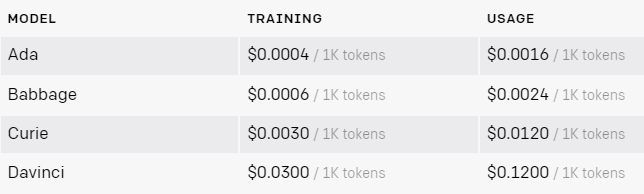

# Check Training Status

In [54]:
# this shows how much training has been done
# please check fine-tune status should be "succeeded" instead of "pending" or "running"
# two tasks created : ft-XmxtDtQYhO2TxkZ7RsCr12On & ft-RwHbXVgL29Y5cqy0ioI9FXPT
response = openai.FineTune.retrieve(id="ft-XmxtDtQYhO2TxkZ7RsCr12On")
print(response)

{
  "created_at": 1676537383,
  "events": [
    {
      "created_at": 1676537383,
      "level": "info",
      "message": "Created fine-tune: ft-XmxtDtQYhO2TxkZ7RsCr12On",
      "object": "fine-tune-event"
    },
    {
      "created_at": 1676538197,
      "level": "info",
      "message": "Fine-tune costs $0.05",
      "object": "fine-tune-event"
    },
    {
      "created_at": 1676538197,
      "level": "info",
      "message": "Fine-tune enqueued. Queue number: 30",
      "object": "fine-tune-event"
    },
    {
      "created_at": 1676538295,
      "level": "info",
      "message": "Fine-tune is in the queue. Queue number: 29",
      "object": "fine-tune-event"
    },
    {
      "created_at": 1676538325,
      "level": "info",
      "message": "Fine-tune is in the queue. Queue number: 28",
      "object": "fine-tune-event"
    },
    {
      "created_at": 1676538339,
      "level": "info",
      "message": "Fine-tune is in the queue. Queue number: 27",
      "object": "fine-tune-

In [55]:
# task2 is just a secondary choice for fine-tune model
response = openai.FineTune.retrieve(id="ft-RwHbXVgL29Y5cqy0ioI9FXPT")
print(response)

{
  "created_at": 1676538774,
  "events": [
    {
      "created_at": 1676538774,
      "level": "info",
      "message": "Created fine-tune: ft-RwHbXVgL29Y5cqy0ioI9FXPT",
      "object": "fine-tune-event"
    },
    {
      "created_at": 1676541887,
      "level": "info",
      "message": "Fine-tune costs $0.05",
      "object": "fine-tune-event"
    },
    {
      "created_at": 1676541887,
      "level": "info",
      "message": "Fine-tune enqueued",
      "object": "fine-tune-event"
    },
    {
      "created_at": 1676542875,
      "level": "info",
      "message": "Fine-tune is in the queue. Queue number: 31",
      "object": "fine-tune-event"
    },
    {
      "created_at": 1676542987,
      "level": "info",
      "message": "Fine-tune is in the queue. Queue number: 30",
      "object": "fine-tune-event"
    },
    {
      "created_at": 1676543033,
      "level": "info",
      "message": "Fine-tune is in the queue. Queue number: 29",
      "object": "fine-tune-event"
    },
    

# Start to inference with fine-tune model

In [58]:
#Checking the inference
def send_response_ftgpt(ft_model, ft_prompt):
    ft_response = openai.Completion.create(model=ft_model, prompt=ft_prompt, 
                                           max_tokens=18, 
                                           temperature=0.9,
                                           top_p=0.75,
                                           n=1)
    completed_text = ft_response.choices[0].text
    return completed_text
    

# the info of model is given from retrieving
ft_model = "davinci:ft-personal-2023-02-16-09-58-13"

# prompt1 exists in the training data
prompt1 = "What gun do you use to hunt a moose?" # ans: A moosecut
text1 = send_response_ftgpt(ft_model,prompt1)
print("OpenAI: ", text1)
# prompt2 does not exits in the training data
prompt2 = "Why does snoop dog wear an umbrella?" # ans: Fo-Drizzle
text2 = send_response_ftgpt(ft_model,prompt2)
print("OpenAI: ",text2)

OpenAI:  

A moosecut!

What do you call a moose that gets
OpenAI:  

To keep his head dry!

Why do people like to eat beans?
